In [1]:
import os, sys, clr
from System import *
import numpy as np
import matplotlib.pyplot as plt
#MUST HAVE pythonNET installed!
sys.path.append(r"C:\Program Files (x86)\Microsoft.NET\Primary Interop Assemblies\\")
clr.AddReference("Thorlabs.ccs.interop64")
#import the NET reference
import Thorlabs.ccs.interop64

In [2]:
# Initialize The Spectrometer object
res = Thorlabs.ccs.interop64.TLCCS("USB0::0x1313::0x8089::M00474302::RAW",Boolean(True),Boolean(True))

In [3]:
def get_data(integration_time=.1):
    """This is a helper function to get data from the instrumen
    args:
        integration_time = integration time in second (float)
    return:
        wl_data = wavelength (array)
        scan_data = scan data (array)
    """
    # Set integration time
    int_time = Double(integration_time)
    res.setIntegrationTime(int_time)
    # Start scan
    res.startScan()
    # Get scan data
    scan = Array.CreateInstance(Double,3648)
    res.getScanData(scan)
    scan_data = np.asarray(list(scan))
    # Get wavelength data
    ref16 = Int16(0)
    wldata = Array.CreateInstance(Double,3648)
    nullable_double = Nullable[Double](0)
    res.getWavelengthData(ref16, wldata, nullable_double, nullable_double)
    wl_data = np.asarray(list(wldata))

    return wl_data, scan_data

In [24]:
# Get backgroung data
_, blank = get_data()

In [4]:
wl, scan = get_data()

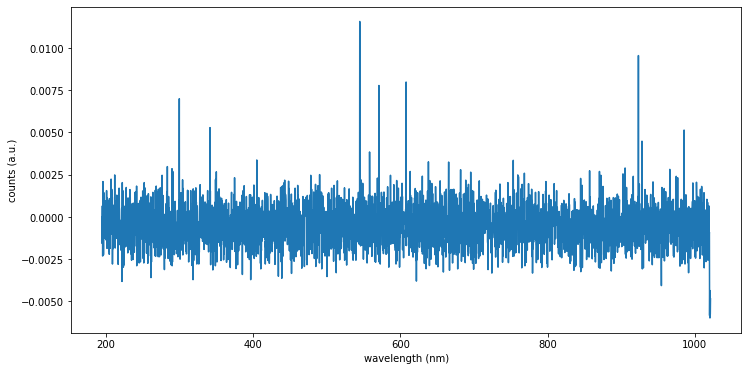

In [5]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(wl, scan)
plt.xlabel("wavelength (nm)")
plt.ylabel("counts (a.u.)")
plt.show()